In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("LR-testSet.csv",delimiter=",")
print(data[:3,:])

[[-0.017612 14.053064  0.      ]
 [-1.395634  4.662541  1.      ]
 [-0.752157  6.53862   0.      ]]


In [3]:
x_data = data[:,:2]
y_data = data[:,2]
print(x_data[:3])
print(y_data[:3])

[[-0.017612 14.053064]
 [-1.395634  4.662541]
 [-0.752157  6.53862 ]]
[0. 1. 0.]


In [4]:
#画图
def plot(data):
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    #分类
    for i in range(len(data)):
        if data[i,2] == 0:
            x0.append(data[i,0])
            y0.append(data[i,1])
        else:
            x1.append(data[i,0])
            y1.append(data[i,1])
    plt.scatter(x0,y0,c = 'b' , marker="o")
    plt.scatter(x1,y1,c = 'r' , marker='x')

In [5]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

In [6]:
def cost_function(x , y , theta):
    h_theta_x = sigmoid(np.dot(x , theta.T))
    I = np.ones(len(y))
    left = np.dot(y.T , np.log(h_theta_x))
    right = np.dot((I - y).T , np.log(I - h_theta_x))
    return -(left + right)

In [7]:
def gradient_descent(x , y , theta , lr , epochs):
    m = len(x)
    theta_gard = 0
    for i in range(epochs):
        h_theta_x = sigmoid(np.dot(x , theta.T))
        theta_gard = np.dot(x.T , h_theta_x - y) / m
        theta = theta - lr * theta_gard
    return theta

In [8]:
x = np.c_[np.ones(len(x_data)) , x_data]
theta = np.ones(3)

In [9]:
cost_function(x , y_data , theta) / 100

5.752727132694213

In [11]:
ws = gradient_descent(x , y_data , theta , 0.001 , 10000)

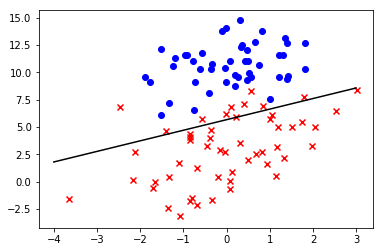

In [21]:
plot(data)
x_test = np.array([-4,3])
y_test = (-ws[0] - x_test*ws[1])/ws[2]
plt.plot(x_test , y_test , 'k')
plt.show()

In [18]:
ws

array([ 2.05827759,  0.35106523, -0.3634033 ])